

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170508288/170498071 [==============================] - 209s 1us/step


### 2. Visualize the First 24 Training Images

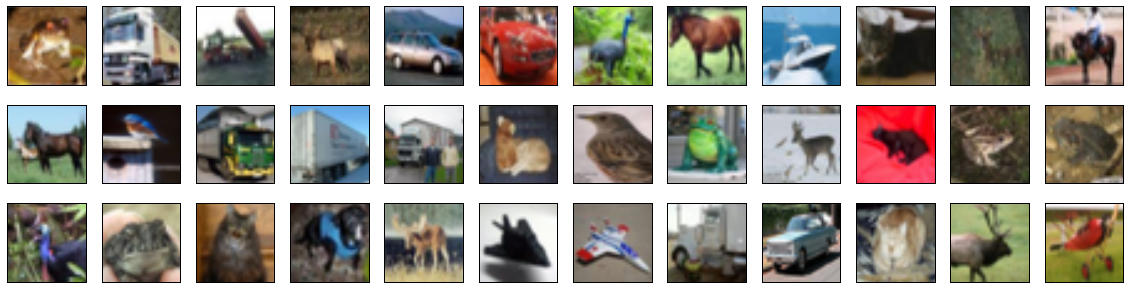

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.80825, saving model to MLP.weights.best.hdf5
 - 66s - loss: 2.1545 - acc: 0.2709 - val_loss: 1.8082 - val_acc: 0.3420
Epoch 2/20
Epoch 00002: val_loss improved from 1.80825 to 1.75949, saving model to MLP.weights.best.hdf5
 - 61s - loss: 1.8356 - acc: 0.3376 - val_loss: 1.7595 - val_acc: 0.3634
Epoch 3/20
Epoch 00003: val_loss did not improve
 - 56s - loss: 1.7916 - acc: 0.3542 - val_loss: 1.8830 - val_acc: 0.3344
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 56s - loss: 1.7712 - acc: 0.3690 - val_loss: 1.8615 - val_acc: 0.3502
Epoch 5/20
Epoch 00005: val_loss improved from 1.75949 to 1.71856, saving model to MLP.weights.best.hdf5
 - 56s - loss: 1.7573 - acc: 0.3759 - val_loss: 1.7186 - val_acc: 0.3738
Epoch 6/20
Epoch 00006: val_loss improved from 1.71856 to 1.71782, saving model to MLP.weights.best.hdf5
 - 56s - loss: 1.7577 - acc: 0.3733 - val_loss: 1.7178 - val_acc: 0.3776

### 8. Load the Model with the Best Classification Accuracy on the Validation Set

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.39419999999999999)
